In [81]:
import pandas as pd
import requests
import os
import tweepy
from PIL import Image
from io import BytesIO
import json
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import re

##### Gathering_1: The WeRateDogs Twitter archive (file on hand).

In [82]:
#set dataframe1
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [83]:
#test archive_df
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [84]:
#used to assessing and result noted below as markdown:
archive_df[archive_df.expanded_urls.duplicated()]
archive_df.loc[archive_df['expanded_urls'] == 'https://twitter.com/dog_rates/status/878057613']
archive_df.expanded_urls
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Gathering_2: Downloading programmatically 'image_predictions.tsv" 

In [85]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(os.path.join(file_name), mode='wb') as file:
        file.write(response.content)
#set dataframe2
image_predictions_df = pd.read_csv(file_name, sep='\t')

In [86]:
# test image_predictions_df:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Gathering_3:

In [87]:
consumer_key = 'F5dFcYFZKee5C40**********'
consumer_secret = 'YpfnGTEIR2NCH5eB1SDowMWjfxab5*********************'
access_token = '339158845-577L6nZih2IDwHdvla818Ftdy1ufgF**********'
access_secret = 'qRln4ezS1y3jUASz8GoQ4VQCB*********************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [88]:
# testing for a tweet_id and read keys:
exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content.keys()

TweepError: [{'code': 215, 'message': 'Bad Authentication data.'}]

In [ ]:
#get one tweet_id data as test:
content['retweet_count'] , content['id'], content['favorite_count']

In [ ]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                    print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                    errors.append(tweet_id)

In [ ]:
api_list = []
for tweet_json in glob.glob('tweet_json.txt'):
    with open(tweet_json, encoding='utf-8') as file:
        for first_tweet in file.readlines():
            first_tweet_dic = json.loads(first_tweet)
            tweet_id = first_tweet_dic['id']
            retweet_count = first_tweet_dic['retweet_count']
            favorite_count = first_tweet_dic['favorite_count']
             # Append to list of dictionaries
            api_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
api_df = pd.DataFrame(api_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [ ]:
# test api_df:
api_df

## Assess

In [89]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [90]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [91]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7458,35330
1,892177421306343426,5535,30573
2,891815181378084864,3661,23003
3,891689557279858688,7627,38616
4,891327558926688256,8227,36888
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [92]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [93]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [95]:
all_columns = pd.Series(list(archive_df) + list(image_predictions_df) + list(api_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [96]:
(archive_df[archive_df['expanded_urls'].isnull()])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [97]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [98]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [99]:
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2619.399399,7380.947233
std,6.823170e+16,4431.924240,11464.323967
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,530.500000,1283.000000
50%,7.182469e+17,1222.000000,3201.000000
75%,7.986692e+17,3041.000000,9029.500000
max,8.924206e+17,75268.000000,152215.000000


In [100]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [101]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [102]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [103]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [104]:
archive_df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Einstein       1
Sprinkles      1
Noah           1
Sweets         1
Zeek           1
Name: name, Length: 957, dtype: int64

In [105]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [106]:
api_df.favorite_count.sort_values()

913          0
196          0
885          0
422          0
583          0
         ...  
1055    112543
129     113759
517     117522
397     129818
1015    152215
Name: favorite_count, Length: 2331, dtype: int64

In [107]:
api_df.retweet_count.sort_values()

279         1
328         2
1271        2
262         2
109         3
        ...  
65      39537
397     42379
517     54900
1055    56045
1015    75268
Name: retweet_count, Length: 2331, dtype: int64

In [108]:
archive_df.rating_numerator.value_counts(sort=True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [109]:
archive_df.loc[archive_df['rating_numerator'] == 0]
# looks like max=1776 and min=0 is not a wrong data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [110]:
archive_df.describe()
archive_df.loc[archive_df['rating_numerator'] == 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [111]:
image_predictions_df.loc[image_predictions_df['p1_dog'] == False]
image_predictions_df.loc[image_predictions_df['p2_dog'] == False]
image_predictions_df.loc[image_predictions_df['p3_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [112]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality
#### `archive_df` table:
note: every point have the same number when cleaning so it is not in order

1- there are data for retweet and replys

2- unnessary columns of rewteets (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

3- `timestamp` is string not datetimestamp

4- some photos are not for dogs

5- some wrong data with wrong urls

8- errornes `name` like 'a' or 'an'

9- inconsistence of Null values as'None' in the `name` column, has 745 'None' cells

10- ther is 23 `rating_denominator` != 10



#### `image_predictions_df` table:

6- there is 66 duplicated jpg_url and there data are duplicated

7- columns head not describeable

## Tidiness

1- doggo, floofer, pupper, puppo is a variables

2- api_df should be part of the `archive_df`

## Clean

In [113]:
# create a copy of each piece of data:
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

#### Define

1- Drop data of replys and retweets from dataframe

#### Code

In [114]:

archive_df_clean = archive_df_clean[archive_df_clean.in_reply_to_status_id.isnull()]
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()]

#### test

In [115]:
 archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define
2- Drop unnessary columns of rewteets (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [116]:
# Drop columns
retweet_reply_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_df_clean.drop(retweet_reply_list ,axis=1, inplace=True)

#### Test

In [117]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
3- Change  ` timestamp` type to datetime

code

In [118]:
# change datatype:
archive_df_clean['timestamp']= pd.to_datetime(archive_df_clean['timestamp'])

#### Test

In [119]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Tidiness
#### 1-  Dog stage is a column head and this is a values

##### Define

remove dog stages column from the empty ones and seperate them at new dataframe
then use *melt* function to make a new column with dog stage name and this will delete the NaNs 
then put the two dataframes together again 

In [120]:

archive_df_clean_dog = archive_df_clean[archive_df_clean.doggo == 'None']
archive_df_clean_dog = archive_df_clean_dog[archive_df_clean_dog.floofer == 'None']
archive_df_clean_dog = archive_df_clean_dog[archive_df_clean_dog.pupper == 'None']
archive_df_clean_dog = archive_df_clean_dog[archive_df_clean_dog.puppo == 'None']

archive_df_clean_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1761 non-null   int64              
 1   timestamp           1761 non-null   datetime64[ns, UTC]
 2   source              1761 non-null   object             
 3   text                1761 non-null   object             
 4   expanded_urls       1759 non-null   object             
 5   rating_numerator    1761 non-null   int64              
 6   rating_denominator  1761 non-null   int64              
 7   name                1761 non-null   object             
 8   doggo               1761 non-null   object             
 9   floofer             1761 non-null   object             
 10  pupper              1761 non-null   object             
 11  puppo               1761 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [121]:
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
archive_df_clean_dog = archive_df_clean_dog.drop(dog_stage_list, axis=1)

In [122]:
# melt dog stages at one column from the original datafram
archive_df_clean = pd.melt(archive_df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name= 'dog_stage', value_name='dose')
archive_df_clean = archive_df_clean[archive_df_clean.dose != "None"]
archive_df_clean = archive_df_clean.drop('dose', axis=1)

In [123]:
#test
archive_df_clean.dog_stage.value_counts()
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 9 to 7158
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            347 non-null    int64              
 1   timestamp           347 non-null    datetime64[ns, UTC]
 2   source              347 non-null    object             
 3   text                347 non-null    object             
 4   expanded_urls       346 non-null    object             
 5   rating_numerator    347 non-null    int64              
 6   rating_denominator  347 non-null    int64              
 7   name                347 non-null    object             
 8   dog_stage           347 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 27.1+ KB


In [124]:
# contact the two dataframes in the original one
archive_df_clean = pd.concat([archive_df_clean, archive_df_clean_dog],
                             ignore_index=True)

#### Test

In [125]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   rating_numerator    2108 non-null   int64              
 6   rating_denominator  2108 non-null   int64              
 7   name                2108 non-null   object             
 8   dog_stage           347 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 148.3+ KB


In [126]:
archive_df_clean.tweet_id.duplicated().sum()

11

#### we have 11 tweets may be have two dogs at one photo

In [127]:
# drop duplicates, we will because they have the same expanded url
archive_df_clean.drop_duplicates(subset='tweet_id', inplace=True)

In [128]:
# test
archive_df_clean.tweet_id.duplicated().sum()

0

In [129]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


## Cleaning

#### Define 

4- At dataframe if p1_dog, p2_dog and p3_dog is False then this is not a dog photo.  use image-predictions dataframe to remove photos that not a dogs at archive_df

#### code

In [130]:
# create a new dataframe with p1_dog, p2_dog and p3_dog is false which be not a dog photo called image_predictions_df_clean2
image_predictions_df_clean2 = image_predictions_df.loc[image_predictions_df['p1_dog'] == False]
image_predictions_df_clean2 = image_predictions_df_clean2.loc[image_predictions_df_clean2['p2_dog'] == False]
image_predictions_df_clean2 = image_predictions_df_clean2.loc[image_predictions_df_clean2['p3_dog'] == False]
image_predictions_df_clean2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [131]:
# merge image_predictions_df_clean2 with the archive dataframe to delete the rows with false photo preddictios
archive_df_clean = pd.merge(archive_df_clean, image_predictions_df_clean2,
                            on=['tweet_id'], how='left')

In [132]:
# delete the rows with false photo prediction and the column of image_predition dataframe
column_list = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
archive_df_clean = archive_df_clean[archive_df_clean.p1_dog.isnull()]
archive_df_clean = archive_df_clean.drop(column_list, axis=1)

#### Test

In [133]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   int64              
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   source              1792 non-null   object             
 3   text                1792 non-null   object             
 4   expanded_urls       1789 non-null   object             
 5   rating_numerator    1792 non-null   int64              
 6   rating_denominator  1792 non-null   int64              
 7   name                1792 non-null   object             
 8   dog_stage           290 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 140.0+ KB


## Tidiness

#### Define
2- Merge the *retweet_count* and *favorite_count* columns to the `archive` table, joining on *tweet_id*.

#### Code

In [134]:
archive_df_clean = pd.merge(archive_df_clean, api_df_clean,
                            on=['tweet_id'], how='left')

#### test

In [135]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 1791
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1792 non-null   int64              
 1   timestamp           1792 non-null   datetime64[ns, UTC]
 2   source              1792 non-null   object             
 3   text                1792 non-null   object             
 4   expanded_urls       1789 non-null   object             
 5   rating_numerator    1792 non-null   int64              
 6   rating_denominator  1792 non-null   int64              
 7   name                1792 non-null   object             
 8   dog_stage           290 non-null    object             
 9   retweet_count       1785 non-null   float64            
 10  favorite_count      1785 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 168.0+ KB


### ReAssessing

In [136]:
archive_df_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                      2
https://twitter.com/dog_rates/status/696713835009417216/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/806219024703037440/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/803638050916102144/video/1                                                                                                                                                          

#### we found a new data quality issue that we have a duplicated expanded_urls and these are not working, but it is looks like the other data are fine because it's have a differnt time stamp and hava a retweets count. and another one with the same site url didn't work

## Cleaning

#### Define 
5- Remove the wrong two expanded_urls data because it's looks like we can't find the tweet at twiter

#### code

In [137]:
archive_df_clean = archive_df_clean[archive_df_clean.expanded_urls != 'https://vine.co/v/ea0OwvPTx9l']
archive_df_clean = archive_df_clean[archive_df_clean.expanded_urls != 'https://vine.co/v/iOWwUPH1hrw']

#### test

In [138]:
archive_df_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/696713835009417216/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/828770345708580865/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/803638050916102144/video/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/682389078323662849/photo/1                                                                                                                                                          

#### Define
###### at images predictions dataframe
6- delete duplicated rows using jpg_url column to find them

#### Code

In [139]:
image_predictions_df_clean.drop_duplicates(subset='jpg_url', inplace=True)

#### Test

In [140]:
sum(image_predictions_df_clean.jpg_url.duplicated())

0

### Define
7- at images predictions dataframe rename columns head because it is not describeable

#### Code

In [141]:
image_predictions_df_clean.rename(columns={'img_num': 'image_number', 'p1': 'prediction_breed_1', 'p1_conf': 'confident_the_algorithm_1', 'p1_dog': 'dog_or_not_1',
                                          'p2': 'prediction_breed_2', 'p2_conf': 'confident_the_algorithm_2', 'p2_dog': 'dog_or_not_2',
                                          'p3': 'prediction_breed_3', 'p3_conf': 'confident_the_algorithm_3', 'p3_dog': 'dog_or_not_3'}, inplace=True)

#### Test

In [142]:
list(image_predictions_df_clean)

['tweet_id',
 'jpg_url',
 'image_number',
 'prediction_breed_1',
 'confident_the_algorithm_1',
 'dog_or_not_1',
 'prediction_breed_2',
 'confident_the_algorithm_2',
 'dog_or_not_2',
 'prediction_breed_3',
 'confident_the_algorithm_3',
 'dog_or_not_3']

#### Define
8- rename  errornes name like 'a' or 'an' to 'NaN's

9- Double chech for names with 'None' at the text row and replace it with NaN

*use the same code to the both issues*

#### Code

In [143]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('an', c_name)

    except IndexError:
        archive_df_clean.loc[index,'name'] = 'NaN'

#### Test

In [144]:
archive_df_clean.name.value_counts(dropna = False)

NaN        500
Lucy        11
Charlie     10
Cooper      10
Tucker       9
          ... 
Hazel        1
Strider      1
Lance        1
Brudge       1
Kohl         1
Name: name, Length: 886, dtype: int64

#### Define
10- investigat the 23 rating_denominator != 10
every error is a unique case so we can search one by one and change or delete them, and here because we can lose them we will delete to prevent get naccurate results

#### Code

In [145]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_denominator == 10]

#### Test

In [146]:
archive_df_clean[archive_df_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [147]:
image_predictions_df_clean.shape

(2009, 12)

In [148]:
archive_df_clean.shape

(1773, 11)

#### Define
merge archive_df_clean and image_predictions_clean to be one dataframe **as the revisioner asked for**

In [149]:
archive_df_clean = pd.merge(archive_df_clean, image_predictions_df_clean,
                            on=['tweet_id'], how='left')

## Save dataframe to files

In [151]:
# Save dataframe to files
archive_df_clean.to_csv('twitter_archive_master.csv', index=False)
image_predictions_df_clean.to_csv('image_predictions_clean.csv', index=False)

# Visualization

### #1: Do higher favorite_count receive higher rating_numerator?
Create a bar chart with one bar for low favorite_count and one bar for high favorite_count.

In [152]:
# Use query to select each group and get its mean quality
median = archive_df_clean['favorite_count'].median()
low = archive_df_clean.query('favorite_count < {}'.format(median))
high = archive_df_clean.query('favorite_count >= {}'.format(median))

mean_quality_low = low['rating_numerator'].mean()
mean_quality_high = high['rating_numerator'].mean()

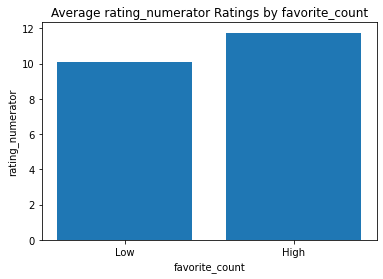

In [153]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average rating_numerator Ratings by favorite_count')
plt.xlabel('favorite_count')
plt.ylabel('rating_numerator');

### #2: Dog_stage  count?


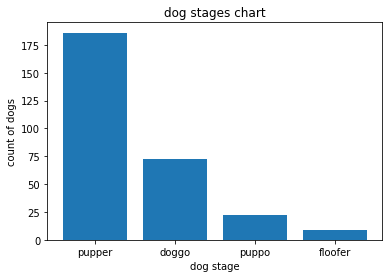

In [154]:
# Use query to select each group and get its mean quality
stage_counts = archive_df_clean['dog_stage'].value_counts()
locations = [1, 2, 3, 4]
labels= ['pupper', 'doggo', 'puppo', 'floofer']

plt.bar(locations, stage_counts, tick_label=labels)
plt.title('dog stages chart')
plt.xlabel('dog stage')
plt.ylabel('count of dogs');

### #3 Dog stage vs Rating

In [155]:
dog_stage_mean = archive_df_clean.groupby('dog_stage').rating_numerator.mean()
dog_stage_mean

dog_stage
doggo      11.808219
floofer    11.888889
pupper     11.043011
puppo      11.954545
Name: rating_numerator, dtype: float64

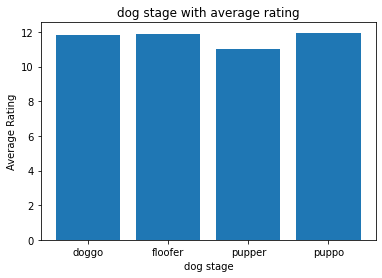

In [156]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]  
stage_counts = dog_stage_mean

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels= ['doggo', 'floofer', 'pupper', 'puppo']

plt.bar(locations, stage_counts, tick_label=labels)
plt.title('dog stage with average rating')
plt.xlabel('dog stage')
plt.ylabel('Average Rating');

In [160]:
archive_df_clean.groupby(['prediction_breed_1']).retweet_count.mean().sort_values(ascending=False)[12::-1]

prediction_breed_1
refrigerator       7068.0
basketball         7248.0
paper_towel        7627.0
cash_machine       7705.0
swing              7883.5
hippopotamus      10931.0
remote_control    12381.0
laptop            12999.0
upright           15762.0
conch             17259.0
Angora            27789.0
bubble            29398.0
Arabian_camel     34315.0
Name: retweet_count, dtype: float64